# Image size limitations
Graphics processing units (GPUs) use memory which limits image size. E.g. on common GPUs, an image can have about a quarter of the size of available memory in the GPU. However, depending on what pixel data type we use, the limit can also be lower.

In [1]:
import pyclesperanto as cle

cle.get_device()

(OpenCL) NVIDIA GeForce RTX 2080 SUPER (OpenCL 3.0 CUDA)
	Type: GPU
	Compute Units: 48
	Global Memory Size: 8366 MB
	Maximum Object Size: 2091 MB

Pixels in memory need to be addressable. If you want to access pixel 5, the computer must be able to locate where this pixel is stored. Pixel adresses are stored in the data type 32-bit integer. This means 2^32 adresses are available. If an image is of type 8-bit, that means every pixel consists of 8-bit, which means 1 byte. As the image can have 2^32 pixels, the image size of an 8-bit is limited to 2^32 bytes. These are...

In [2]:
number_of_bytes = 2**32
number_of_bytes

4294967296

In [3]:
number_of_kilobytes = number_of_bytes / 1024
number_of_kilobytes

4194304.0

In [4]:
number_of_megabytes = number_of_kilobytes / 1024
number_of_megabytes

4096.0

In [5]:
number_of_gigabytes = number_of_megabytes / 1024
number_of_gigabytes

4.0

... Giga-Bytes.

This notebook is executed on a computer that has technically 32 GB of GPU memory. Hence, it should be possible to allocate multiple images of that size:

In [8]:
image = cle.create((1024, 1024, 4 * 1024))

... and apply an operations to it:

In [9]:
result = cle.set_ramp_x(image)
result.shape

(1024, 1024, 1024)

array([[[0.000e+00, 1.000e+00, 2.000e+00, ..., 1.021e+03, 1.022e+03,
         1.023e+03],
        [0.000e+00, 1.000e+00, 2.000e+00, ..., 1.021e+03, 1.022e+03,
         1.023e+03],
        [0.000e+00, 1.000e+00, 2.000e+00, ..., 1.021e+03, 1.022e+03,
         1.023e+03],
        ...,
        [0.000e+00, 1.000e+00, 2.000e+00, ..., 1.021e+03, 1.022e+03,
         1.023e+03],
        [0.000e+00, 1.000e+00, 2.000e+00, ..., 1.021e+03, 1.022e+03,
         1.023e+03],
        [0.000e+00, 1.000e+00, 2.000e+00, ..., 1.021e+03, 1.022e+03,
         1.023e+03]],

       [[0.000e+00, 1.000e+00, 2.000e+00, ..., 1.021e+03, 1.022e+03,
         1.023e+03],
        [0.000e+00, 1.000e+00, 2.000e+00, ..., 1.021e+03, 1.022e+03,
         1.023e+03],
        [0.000e+00, 1.000e+00, 2.000e+00, ..., 1.021e+03, 1.022e+03,
         1.023e+03],
        ...,
        [0.000e+00, 1.000e+00, 2.000e+00, ..., 1.021e+03, 1.022e+03,
         1.023e+03],
        [0.000e+00, 1.000e+00, 2.000e+00, ..., 1.021e+03, 1.022e+03,
         1.023e+03],
        [0.000e+00, 1.000e+00, 2.000e+00, ..., 1.021e+03, 1.022e+03,
         1.023e+03]],

       [[0.000e+00, 1.000e+00, 2.000e+00, ..., 1.021e+03, 1.022e+03,
         1.023e+03],
        [0.000e+00, 1.000e+00, 2.000e+00, ..., 1.021e+03, 1.022e+03,
         1.023e+03],
        [0.000e+00, 1.000e+00, 2.000e+00, ..., 1.021e+03, 1.022e+03,
         1.023e+03],
        ...,
        [0.000e+00, 1.000e+00, 2.000e+00, ..., 1.021e+03, 1.022e+03,
         1.023e+03],
        [0.000e+00, 1.000e+00, 2.000e+00, ..., 1.021e+03, 1.022e+03,
         1.023e+03],
        [0.000e+00, 1.000e+00, 2.000e+00, ..., 1.021e+03, 1.022e+03,
         1.023e+03]],

       ...,

       [[0.000e+00, 1.000e+00, 2.000e+00, ..., 1.021e+03, 1.022e+03,
         1.023e+03],
        [0.000e+00, 1.000e+00, 2.000e+00, ..., 1.021e+03, 1.022e+03,
         1.023e+03],
        [0.000e+00, 1.000e+00, 2.000e+00, ..., 1.021e+03, 1.022e+03,
         1.023e+03],
        ...,
        [0.000e+00, 1.000e+00, 2.000e+00, ..., 1.021e+03, 1.022e+03,
         1.023e+03],
        [0.000e+00, 1.000e+00, 2.000e+00, ..., 1.021e+03, 1.022e+03,
         1.023e+03],
        [0.000e+00, 1.000e+00, 2.000e+00, ..., 1.021e+03, 1.022e+03,
         1.023e+03]],

       [[0.000e+00, 1.000e+00, 2.000e+00, ..., 1.021e+03, 1.022e+03,
         1.023e+03],
        [0.000e+00, 1.000e+00, 2.000e+00, ..., 1.021e+03, 1.022e+03,
         1.023e+03],
        [0.000e+00, 1.000e+00, 2.000e+00, ..., 1.021e+03, 1.022e+03,
         1.023e+03],
        ...,
        [0.000e+00, 1.000e+00, 2.000e+00, ..., 1.021e+03, 1.022e+03,
         1.023e+03],
        [0.000e+00, 1.000e+00, 2.000e+00, ..., 1.021e+03, 1.022e+03,
         1.023e+03],
        [0.000e+00, 1.000e+00, 2.000e+00, ..., 1.021e+03, 1.022e+03,
         1.023e+03]],

       [[0.000e+00, 1.000e+00, 2.000e+00, ..., 1.021e+03, 1.022e+03,
         1.023e+03],
        [0.000e+00, 1.000e+00, 2.000e+00, ..., 1.021e+03, 1.022e+03,
         1.023e+03],
        [0.000e+00, 1.000e+00, 2.000e+00, ..., 1.021e+03, 1.022e+03,
         1.023e+03],
        ...,
        [0.000e+00, 1.000e+00, 2.000e+00, ..., 1.021e+03, 1.022e+03,
         1.023e+03],
        [0.000e+00, 1.000e+00, 2.000e+00, ..., 1.021e+03, 1.022e+03,
         1.023e+03],
        [0.000e+00, 1.000e+00, 2.000e+00, ..., 1.021e+03, 1.022e+03,
         1.023e+03]]], dtype=float32, mtype=buffer)
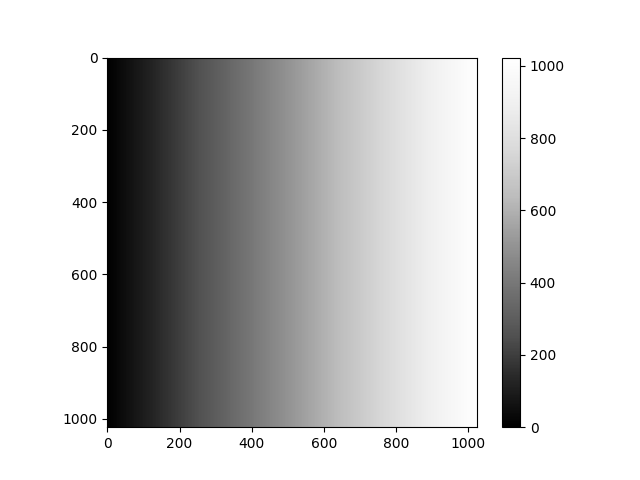
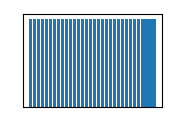

In [12]:
result

In [11]:
print(cle.cl_info())

AttributeError: module 'pyclesperanto' has no attribute 'cl_info'